# Stack Overflow

## Introduction 

In this assignment, we will use some posts on Stack Overflow during the year of 2015 and measure the similarity of  users by looking at their answers' score. In order to get a full grade, do not delete the output of your code cells. This assignment is to be completed **INDIVIDUALLY** and is due on **September 29**.

Please update the README with your BU username.

## Step 0. Preparation

Before we start working on the notebook, let's make sure that everything is setup properly. You should have downloaded and installed
* [Anaconda](https://store.continuum.io/cshop/anaconda/)
* [Git](http://git-scm.com/downloads)

If you are working from the undergraduate lab (on a linux machine) these are both installed, but you need to follow the instructions [from here](https://github.com/mcrovella/CS505-Computational-Tools-for-Data-Science/blob/master/2-Getting-Started.ipynb).



## Step 1. Getting the data

Let's make a sample request to retrieve some questions posted on Stack Exchange on the first day of 2015. Documentation of the Stack Exchange API can be found [here](https://api.stackexchange.com/docs). You might need to install the *requests* library and an easy way to do so is by using the command [pip](https://docs.python.org/3/installing/index.html).

In [2]:
import requests
from datetime import datetime

start_time = 1420070400 # 01-01-2015 at 00:00:00
end_time   = 1420156800 # 01-02-2015 at 00:00:00

response = requests.get("https://api.stackexchange.com/2.2/questions?pagesize=100" +
                        "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow")
print(response)
type(response)

<Response [200]>


requests.models.Response

Now, object *response* contains the raw text of posts from the first day of 2015. 
Note that all dates in the Stack Exchange API are in [unix epoch time](https://en.wikipedia.org/wiki/Unix_time). The format for the request string is specified [here](https://api.stackexchange.com/docs/questions).

We can try to print the response that Stack Exchange returns.

In [3]:
print(response.text)

{"items":[{"tags":["php","mysql","arrays","mysqli"],"owner":{"reputation":230,"user_id":3210431,"user_type":"registered","accept_rate":78,"profile_image":"https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1","display_name":"salep","link":"https://stackoverflow.com/users/3210431/salep"},"is_answered":true,"view_count":247,"accepted_answer_id":27727478,"answer_count":2,"score":0,"last_activity_date":1420071815,"creation_date":1420070458,"question_id":27727385,"link":"https://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array","title":"Inserting multiple records into MySQL from an array"},{"tags":["apache-pig"],"owner":{"reputation":6,"user_id":868779,"user_type":"registered","profile_image":"https://www.gravatar.com/avatar/19f7315b44e97ca1bc069694fdba7428?s=128&d=identicon&r=PG","display_name":"Balpreet Pankaj","link":"https://stackoverflow.com/users/868779/balpreet-pankaj"},"is_answered":false,"view_count":924,"answer_count":1,"score":1,"last_activity_dat

It is not possible to read the raw response. Instead, we need to decode the raw response as **JSON** and use the `json` library to print it. JavaScript Object Notation (JSON) is a standard text-based format for representing structured data based on JavaScript object syntax, which is commonly used for representing and transmitting data on web sites. More documentation on json objects can be found [here](https://developer.mozilla.org/en-US/docs/Learn/JavaScript/Objects/JSON) 

In [4]:
import json

json_response = response.json()

print(json.dumps(json_response, indent=1))

{
 "has_more": true, 
 "items": [
  {
   "is_answered": true, 
   "view_count": 247, 
   "tags": [
    "php", 
    "mysql", 
    "arrays", 
    "mysqli"
   ], 
   "last_activity_date": 1420071815, 
   "answer_count": 2, 
   "creation_date": 1420070458, 
   "score": 0, 
   "link": "https://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array", 
   "accepted_answer_id": 27727478, 
   "owner": {
    "user_id": 3210431, 
    "profile_image": "https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1", 
    "user_type": "registered", 
    "reputation": 230, 
    "link": "https://stackoverflow.com/users/3210431/salep", 
    "accept_rate": 78, 
    "display_name": "salep"
   }, 
   "title": "Inserting multiple records into MySQL from an array", 
   "question_id": 27727385
  }, 
  {
   "is_answered": false, 
   "view_count": 924, 
   "tags": [
    "apache-pig"
   ], 
   "last_activity_date": 1430411692, 
   "answer_count": 1, 
   "creation_date": 1420070503, 
   "score"

Now we can easily see that the response consists of a list of question items. For each of these items, we get information about its attributes such as its `creation_date`, `answer_count`, `owner`, `title`, etc.

Notice that has_more is true. To get more items, we can [request the next page](https://api.stackexchange.com/docs/paging).

-----------------

## Step 2. Parsing the responses

In this section, we practice some of the basic Python tools that we learned in class and the powerful string handling methods that Python offers. Our goal is to be able to pick the interesting parts of the response and transform them in a format that will be useful to us.

First let's isolate the creation_date in the response. Fill in the rest of the ```print_creation_dates_json()``` function that reads the response and prints the creation dates and whether the question was answered. Your solution should be in the form **(creation_date,is_answered)**. Notice that a JSON object is basically a dictionary. **(5 pts)**

In [5]:
def print_creation_dates_is_answered_json(response):
    """
    Prints the creation_date of all the questions in the response.
    
    Parameters:
        response: Response object
    """
    return [(i["creation_date"], i["is_answered"]) for i in response["items"]]

Write the code that calls the ```print_creation_dates_is_answered_json()``` function to print out all the creation dates of questions posted on the first day in 2015. Please be aware of Stack Exchange's [rate limit](https://api.stackexchange.com/docs/throttle). This means that after getting a request, you will need to wait for some seconds before making a new request. If you do not do that, stack exchange will block you from making any new requests. **(5 pts)**

In [6]:
print_creation_dates_is_answered_json(json_response)

[(1420070458, True),
 (1420070503, False),
 (1420070552, True),
 (1420070577, True),
 (1420070611, True),
 (1420070641, False),
 (1420070703, False),
 (1420070727, True),
 (1420070734, True),
 (1420070777, False),
 (1420070801, True),
 (1420070848, True),
 (1420070859, True),
 (1420070866, False),
 (1420070968, True),
 (1420071005, False),
 (1420071029, True),
 (1420071103, True),
 (1420071122, True),
 (1420071175, True),
 (1420071184, False),
 (1420071212, False),
 (1420071230, False),
 (1420071340, True),
 (1420071431, True),
 (1420071530, True),
 (1420071736, False),
 (1420071794, True),
 (1420071830, True),
 (1420071868, False),
 (1420071907, True),
 (1420071929, True),
 (1420071939, True),
 (1420072002, False),
 (1420072021, False),
 (1420072074, True),
 (1420072129, False),
 (1420072243, True),
 (1420072342, True),
 (1420072354, True),
 (1420072397, False),
 (1420072430, True),
 (1420072455, False),
 (1420072481, True),
 (1420072610, True),
 (1420072638, True),
 (1420072667, True

Due to time constraints, we have downloaded the [data dump](https://drive.google.com/a/bu.edu/file/d/0BzeSDLWpnNHxaEd5XzhIZ2tJMlU/view?usp=sharing) for Stack Overflow's posts in 2015. Note that the XML file is 10GB. If you don't have space on your computer, you can download it into `/scratch` on one of the machines in the undergrad lab or you can download it onto a USB. Your solution should work with the whole dataset.

Do not commit the data file to your github. You may assume that we will place the data file in the same directory as your IPython Notebook, so provide a relative path when loading the data file.

Write a function to parse out the questions and answers posted in 2015. Questions are posts with `PostTypeId=1` and answers are posts with `PostTypeId=2`. Then: 
1. Make a `pandas DataFrame` with the following 7 columns: `Id`, `CreationDate`, `OwnerUserId`, the first tag in `Tags`, `ViewCount`, `Score`, `Type`. Note that the first 3 columns are common for both questions and answers, the following 2 are only identified in questions and the next column in answers. Finally column `Type` is used show whether the row of the data frame corresponds to a question or answer. You can assign 'Q' for question and 'A' for answer to this column. Also, if you do not have a value for a column, for instance an answer does not have a view count, then simply add None as a value.   
2. Print out the time required to parse the questions (data file).
3. Print out the DataFrame.
4. Do not clear the output. 
**(10 pts)**

Some hints/library you might find useful are the following:
1. One library you can use to parse the large .xml file is the `xml.etree.ElementTree` library. More documentation can be found [here](https://docs.python.org/2/library/xml.etree.elementtree.html).
2. Due to the required parsing time, it is strongly recommended that you write the parsed data in another file on the disk. Thus, even if something goes wrong you will always have these data to work with, which will give you partial credit.
3. Before traversing the whole dataset, play with a small subset first in order to construct your solution fast.



In [7]:
# File imports
import xml.etree.ElementTree as ET
import pandas as pd
import time

# create columns
columns = ['Id', 'CreationDate', 'OwnerUserId', 'Tag', 'ViewCount', 'Score', 'Type']
'''
The first 3 columns are common for both questions and answers,
the following 2 are only identified in questions and the next column in answers.
And column Type is used to show whether the row of the data frame corresponds to a question or answer.
'Q' is assigned for question and 'A' is assigned for answer to this column.
'''
# open a csv file to write the parsed data
outfile = open('HW-1-1.csv', 'w')
# print the 7 columns in the first row
outfile.write(','.join(columns) + '\n')
# use iterparse for more efficient parsing
parser = ET.iterparse('stackoverflow-posts-2015.xml')
iterator = iter(parser)
event, r = next(iterator)
start = time.time()
for event, element in iterator:
    if element.tag == 'row':
        row = [] # a list to store the 7 features to be printed
        Id = element.get('Id')
        if Id == None:
            Id = 'None'
        row.append(Id)
        CreationDate = element.get('CreationDate')
        if CreationDate == None:
            CreationDate = 'None'
        row.append(CreationDate)
        OwnerUserId = element.get('OwnerUserId')
        if OwnerUserId == None:
            OwnerUserId = 'None'
        row.append(OwnerUserId)
        Tags = element.get('Tags')
        if Tags == None:
            Tag = 'None'
        else:
            Tag = Tags[Tags.index('<') + 1 : Tags.index('>')]
        row.append(Tag)
        ViewCount = element.get('ViewCount')
        if ViewCount == None:
            ViewCount = 'None'
        row.append(ViewCount)
        Score = element.get('Score')
        if Score == None:
            Score = 'None'
        row.append(Score)
        PostTypeId = element.get('PostTypeId')
        if PostTypeId == '1': # posts with PostTypeId 1 are questions
            Type = 'Q'
        elif PostTypeId == '2': # posts with PostTypeId 2 are answers
            Type = 'A'
        else:
            continue
        row.append(Type)
        
        # now we have all 7 features and are ready to print
        outfile.write(','.join(row) + '\n')

r.clear()
outfile.close()
end = time.time()
print 'Parsing time in seconds:' + ' ' + str(end - start)

Parsing time in seconds: 517.19905901


In [36]:
df = pd.read_csv('HW-1-1.csv') # read the csv file as a pandas DataFrame and print it out
print df

               Id             CreationDate OwnerUserId             Tag  \
0        27727382  2015-01-01T00:00:31.240     2410359            None   
1        27727384  2015-01-01T00:00:50.550     1366219            None   
2        27727385  2015-01-01T00:00:58.253     3210431             php   
3        27727387  2015-01-01T00:01:43.597     3886175            None   
4        27727388  2015-01-01T00:01:43.673      868779      apache-pig   
5        27727389  2015-01-01T00:02:02.050     3925941            None   
6        27727390  2015-01-01T00:02:30.233     1004312            None   
7        27727391  2015-01-01T00:02:32.123     4372672             ios   
8        27727393  2015-01-01T00:02:57.983     2482149      sql-server   
9        27727394  2015-01-01T00:03:31.337     4263870             php   
10       27727396  2015-01-01T00:04:01.407     4409381         android   
11       27727397  2015-01-01T00:04:02.813     4362545            None   
12       27727398  2015-01-01T00:04:26

-----------------

## Step 3. Putting it all together

We are now ready to tackle our original problem. Write a function to measure the similarity of the top 100 users with the highest answer scores. Compare the users based on the types of questions they answer. We will categorize a question by its first tag. You may choose to implement any one of the similarity/distance measures we discussed in class. **(30pts)**

Note that answers are posts with `PostTypeId=2`. The ID of the question in answer posts is the `ParentId`.

You may find the [sklearn.feature_extraction](http://scikit-learn.org/stable/modules/feature_extraction.html) module helpful.

In [155]:
import collections
# create a dictionary to store OwnerUserID and scores
D = {}
#iterate over df to aggregate OwnerUserIds and add up total scores
for row in df.itertuples():
    key = row.OwnerUserId
    if key != 'None' and key not in D:
        D[key] = row.Score
    elif key != 'None':
        D[key] += row.Score
C = collections.Counter(D)
Top100 = C.most_common(100) # get the top 100 OwnerUserIds with the highest total scores

AllTags = set() # initialize a set to store all the tags the top 100 users used
for t in Top100:
    UserTags = df[(df['OwnerUserId'] == t[0]) & (df['Type'] == 'Q')].as_matrix(['Tag'])
    for i in UserTags:
        if i[0] != 'None' and i[0] not in AllTags:
            AllTags.add(i[0])
AllTags = sorted(AllTags)

# Create a dictionary to store one string for each of the top 100 users that consists of 0s and 1s.
# There are 101 digits corresponding to all 101 tags we have seen. Each digit indicates whether this user
# has used this tag or not. 0 for no and 1 for yes. Note that the 101 tags are sorted.
features = {}
for t in Top100:
    feature = ''
    UserTags = df[(df['OwnerUserId'] == t[0]) & (df['Type'] == 'Q')].as_matrix(['Tag'])
    for x in AllTags:
        if x in UserTags:
            feature += '1'
        else:
            feature += '0'
    features[t[0]] = feature
    
# Turn the strings of 0s and 1s into a matrix
X = []
for key, value in features.iteritems():
    v = map(int, list(value))
    X.append(v)
X = np.asarray(X)

Plot the distance of the top 100 users using a [heatmap](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html). **(5 pts)**

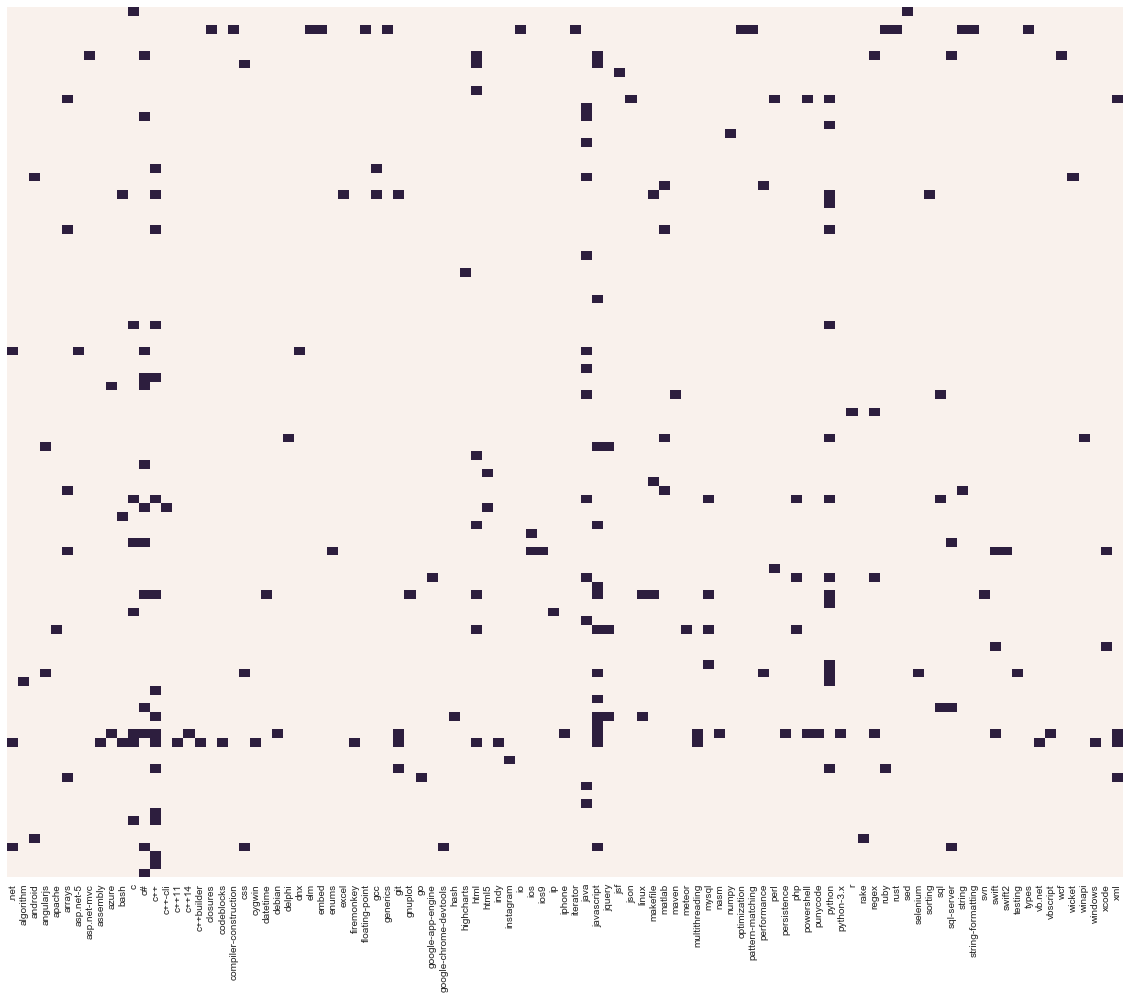

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 16))
# this heatmap shows whether a user has used each of the 101 tags, with tags labeled on the x axis
_ = sns.heatmap(X, xticklabels=list(sorted(AllTags)), yticklabels=False, linewidths=0, cbar=False)

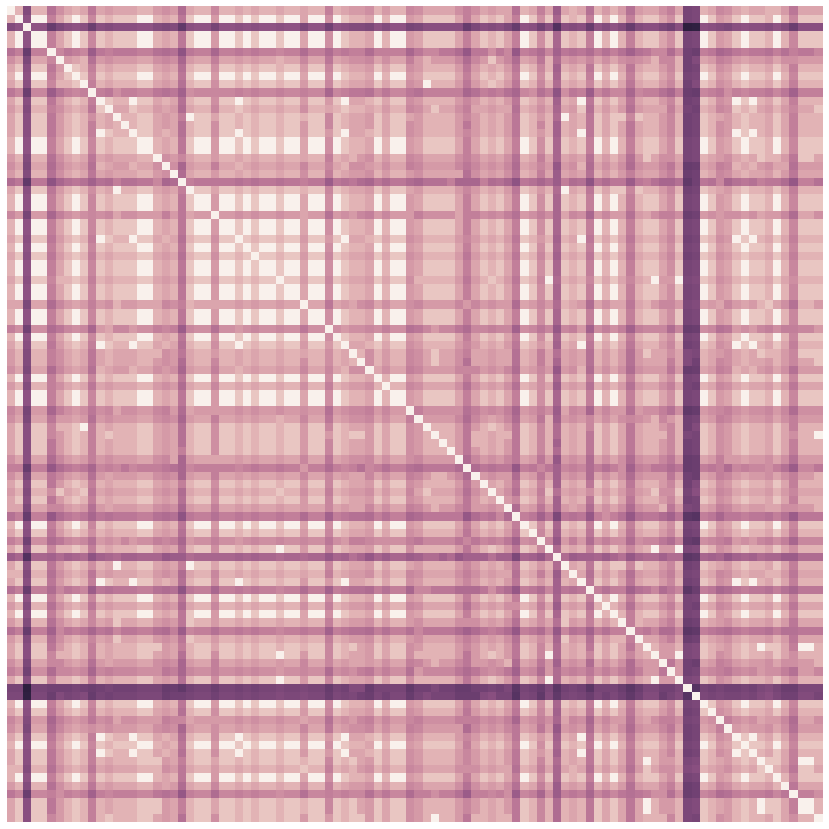

In [147]:
import sklearn.metrics as metrics
dist = metrics.euclidean_distances(X)
plt.figure(figsize=(15, 15))
# this heatmap shows the euclidean distances between the top 100 users each with 101 features
_ = sns.heatmap(dist, xticklabels=False, yticklabels=False, linewidths=0, square=True, cbar=False)

Provide an interpretation of the heatmap's results in the following markdown cell. **(5 pts)**

From the first heatmap, we can see that the most popular question tags that the top 100 users tend to answer are c, c#, c++, java, javascript and python. This makes sense because these are the most common programming languages.
From the second heatmap, we can see the big white square indicating similarity between users. Note that the OwnerUserIds are sorted in descending order of their total scores. The white square shows us that the users with the highest scores tend to answer similar types of questions.

-----------------